In [1]:
import torch
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import os

In [4]:
os.getcwd()

'C:\\Users\\Asus\\Desktop\\DEEP LEARNING PLURALSIGHT\\Bike Sharing Demand Regression NN'

In [5]:
df=pd.read_csv("nntrain.csv",index_col=0)

In [6]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [7]:
data=pd.get_dummies(df,columns=['season'])
data.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0,0,0
2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,40,1,0,0,0
2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,32,1,0,0,0
2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,13,1,0,0,0
2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,1,0,0,0


In [8]:
#features=data['holiday','workingday','weather','temp','humidity','windspeed','casual','registered','season_1','season_2','season_3','season_4']
target=data['count']

In [9]:
features=data.drop('count',axis=1)

In [10]:
features.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,0,0,1,9.84,14.395,81,0.0,3,13,1,0,0,0
2011-01-01 01:00:00,0,0,1,9.02,13.635,80,0.0,8,32,1,0,0,0
2011-01-01 02:00:00,0,0,1,9.02,13.635,80,0.0,5,27,1,0,0,0
2011-01-01 03:00:00,0,0,1,9.84,14.395,75,0.0,3,10,1,0,0,0
2011-01-01 04:00:00,0,0,1,9.84,14.395,75,0.0,0,1,1,0,0,0


In [11]:
from sklearn.model_selection import train_test_split

In [28]:
train_x,test_x,y_train,y_test=train_test_split(features,target,test_size=0.2)

In [25]:
train_x.shape,y_train.shape,test_x.shape,y_test.shape

(torch.Size([8708, 13]), (8708,), torch.Size([2178, 13]), (2178,))

In [29]:
train_x=torch.tensor(train_x.values,dtype=torch.float)
test_x=torch.tensor(test_x.values,dtype=torch.float)
train_y=torch.tensor(y_train.values,dtype=torch.float)
test_y=torch.tensor(y_test.values,dtype=torch.float)


In [30]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

In [31]:
train_x.shape,train_y.shape

(torch.Size([8708, 13]), torch.Size([8708]))

In [32]:
train_d=TensorDataset(train_x,train_y)

In [33]:
train_dl=DataLoader(train_d,batch_size=100,shuffle=True)

In [34]:
feature_batch,target_batch=iter(train_dl).next()

In [36]:
feature_batch.shape,target_batch.shape

(torch.Size([100, 13]), torch.Size([100]))

In [38]:
inp=train_x.shape[1]
hidden=10
out=1

In [39]:
loss=torch.nn.MSELoss()

In [86]:
model=torch.nn.Sequential(torch.nn.Linear(inp,hidden),
                          torch.nn.Sigmoid(),
                          torch.nn.Linear(hidden,out))

In [41]:
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [43]:
total_step=len(train_dl)
total_step

88

In [67]:
num_epoch=1000

In [87]:
for epoch in range(num_epoch):
    for i,(features,target) in enumerate(train_dl):
        pred=model(features)
        loss_model=loss(pred,target)
        optimizer.zero_grad()
        loss_model.backward()
        optimizer.step()
        if epoch%500==0:
            print('epoch:',i, ",steps:",total_step," loss:",loss_model.item())


D:\Anaconda Python\Anaconda Setup\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([100])) that is different to the input size (torch.Size([100, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0 ,steps: 88  loss: 80728.9140625
epoch: 1 ,steps: 88  loss: 70755.859375
epoch: 2 ,steps: 88  loss: 67501.015625
epoch: 3 ,steps: 88  loss: 77886.3515625
epoch: 4 ,steps: 88  loss: 72861.578125
epoch: 5 ,steps: 88  loss: 63347.6171875
epoch: 6 ,steps: 88  loss: 83659.546875
epoch: 7 ,steps: 88  loss: 64077.32421875
epoch: 8 ,steps: 88  loss: 74139.5546875
epoch: 9 ,steps: 88  loss: 61087.0
epoch: 10 ,steps: 88  loss: 54103.1953125
epoch: 11 ,steps: 88  loss: 70764.2109375
epoch: 12 ,steps: 88  loss: 65647.4296875
epoch: 13 ,steps: 88  loss: 72239.4140625
epoch: 14 ,steps: 88  loss: 51552.6015625
epoch: 15 ,steps: 88  loss: 70410.5703125
epoch: 16 ,steps: 88  loss: 80114.6015625
epoch: 17 ,steps: 88  loss: 66394.828125
epoch: 18 ,steps: 88  loss: 69521.5859375
epoch: 19 ,steps: 88  loss: 75647.8828125
epoch: 20 ,steps: 88  loss: 66465.2578125
epoch: 21 ,steps: 88  loss: 60246.765625
epoch: 22 ,steps: 88  loss: 92299.0703125
epoch: 23 ,steps: 88  loss: 72383.4765625
epoch: 24 ,st

D:\Anaconda Python\Anaconda Setup\lib\site-packages\torch\nn\modules\loss.py:446: UserWarning: Using a target size (torch.Size([8])) that is different to the input size (torch.Size([8, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch: 0 ,steps: 88  loss: 74540.6484375
epoch: 1 ,steps: 88  loss: 68012.4375
epoch: 2 ,steps: 88  loss: 74540.21875
epoch: 3 ,steps: 88  loss: 84055.6484375
epoch: 4 ,steps: 88  loss: 52886.109375
epoch: 5 ,steps: 88  loss: 53012.51953125
epoch: 6 ,steps: 88  loss: 61716.30078125
epoch: 7 ,steps: 88  loss: 76107.1640625
epoch: 8 ,steps: 88  loss: 42842.21875
epoch: 9 ,steps: 88  loss: 74143.296875
epoch: 10 ,steps: 88  loss: 82922.0703125
epoch: 11 ,steps: 88  loss: 59923.33984375
epoch: 12 ,steps: 88  loss: 60823.4375
epoch: 13 ,steps: 88  loss: 76102.6875
epoch: 14 ,steps: 88  loss: 81529.4375
epoch: 15 ,steps: 88  loss: 71166.890625
epoch: 16 ,steps: 88  loss: 61780.72265625
epoch: 17 ,steps: 88  loss: 56436.6640625
epoch: 18 ,steps: 88  loss: 57324.3203125
epoch: 19 ,steps: 88  loss: 69004.671875
epoch: 20 ,steps: 88  loss: 59603.9609375
epoch: 21 ,steps: 88  loss: 62873.984375
epoch: 22 ,steps: 88  loss: 80359.8984375
epoch: 23 ,steps: 88  loss: 65410.0078125
epoch: 24 ,steps: 8

In [76]:
model.eval()

Sequential(
  (0): Linear(in_features=13, out_features=10, bias=True)
  (1): ReLU()
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [88]:
with torch.no_grad():
    y_pred=model(test_x)
y_prd=y_pred.detach().numpy()
compare_df=pd.DataFrame(({'actual':np.squeeze(test_y),'predicted':np.squeeze(y_pred)}
                        ))
compare_df.head(100)

,actual,predicted
0,57.0,-0.067217
1,82.0,-0.095495
2,641.0,0.147844
3,138.0,-0.100305
4,11.0,-0.063496
...,...,...
95,6.0,-0.067542
96,258.0,-0.028854
97,441.0,0.082886
98,134.0,0.076157


In [78]:
from sklearn.metrics import r2_score

In [89]:
r2_score(test_y,y_pred)

-1.11875588586611

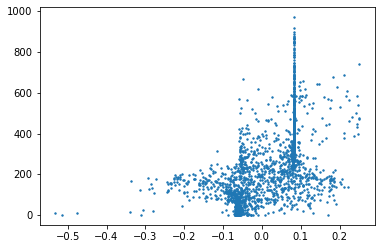

In [92]:
plt.scatter(y_pred,test_y,s=2)